In [1]:
# import libraries

In [2]:
# import cv2 as cv
# import numpy as np

In [3]:
#  image crop and resize

In [4]:
# img = cv.imread("main.jpg",0)
# cv.imshow("original", img)
# blur = cv.GaussianBlur(img,(5,5),0)
# threshold, breast_mask = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# cnts, _ = cv.findContours(breast_mask.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# cnt = max(cnts, key = cv.contourArea)
# x, y, w, h = cv.boundingRect(cnt)
# # print(x,y,w,h)
# crop = img[y:y+h, x:x+w] 
# breast_crop = breast_mask[y:y+h, x:x+w]

# cv.imshow("crp", crop)
# cv.imshow("crp1", breast_crop)
# cv.waitKey(0)          
# cv.destroyAllWindows()

In [5]:
# stretch_near = cv.resize(crop, (300, 300),
#                interpolation = cv.INTER_AREA)
# cv.imshow("resize img",stretch_near)
# cv.waitKey(0)          
# cv.destroyAllWindows()

In [6]:
# set thresold

In [7]:
# from skimage.filters import median
# img_salt_pepper_noise = cv.imread('main.jpg', 0)

# # img = img_salt_pepper_noise
# # img = crop
# img = stretch_near


# median_using_cv2 = cv.medianBlur(img, 3)

# from skimage.morphology import disk  
# #Disk creates a circular structuring element, similar to a mask with specific radius
# median_using_skimage = median(img, disk(3), mode='constant', cval=0.0)


# cv.imshow("Original", img)
# cv.imshow("cv2 median", median_using_cv2)
# cv.imshow("Using skimage median", median_using_skimage)

# cv.waitKey(0)          
# cv.destroyAllWindows()

In [8]:
# img = cv.imread("main.jpg")
# # cv.imshow("main image",img)

# threshold, thresh = cv.threshold(median_using_cv2, 223,255, cv.THRESH_BINARY)
# cv.imshow('cv', thresh)

# threshold1, thresh1 = cv.threshold(median_using_skimage, 223,255, cv.THRESH_BINARY)
# cv.imshow('sk', thresh1)

# cv.waitKey(0)
# cv.destroyAllWindows()

In [9]:
# Image processing

In [1]:
# Import Libraries
import cv2 as cv
import numpy as np
from PIL import Image, ImageStat
from pylab import imshow, show

# Image resize and print original, Filtered and Segmentation image
path = "main2.jpg"
# img = cv.imread("main2.jpg",0)
img = cv.imread(path,0)
resize = cv.resize(img, (300, 300),
               interpolation = cv.INTER_AREA)
cv.imshow("Original",resize)

blur = cv.GaussianBlur(img,(5,5),0)
threshold, breast_mask = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
cnts, _ = cv.findContours(breast_mask.astype(np.uint8), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt = max(cnts, key = cv.contourArea)
x, y, w, h = cv.boundingRect(cnt)
crop = img[y:y+h, x:x+w] 
breast_crop = breast_mask[y:y+h, x:x+w]

resize1 = cv.resize(crop, (300, 300),
               interpolation = cv.INTER_AREA)
resize2 = cv.resize(breast_crop, (300, 300),
               interpolation = cv.INTER_AREA)
cv.imshow("Filter",resize1)
cv.imshow("Segmentation", resize2)

# Set thresold and find Final image

from skimage.filters import median
final_img = resize1

from skimage.morphology import disk  
#Disk creates a circular structuring element, similar to a mask with specific radius
median_using_skimage = median(final_img, disk(3), mode='constant', cval=0.0)

threshold1, thresh1 = cv.threshold(median_using_skimage, 223,255, cv.THRESH_BINARY)
cv.imshow('Detection', thresh1)

cv.waitKey(0)          
cv.destroyAllWindows()

In [9]:
# Model

In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
# data_dir = 'C:\\Users\\Administrator\\Desktop\\MACHINE LEARNING\\Projects\\Shape AI\\Flowers Classification\\Flowers\\'
data_dir = "D:\MACHINE LEARNING\Projects\Breast Cancer Detection\Dataset"

In [3]:
categories = ["Normal","Abnormal"]

In [4]:
data = []
def make_data():
    for category in categories:
        path = os.path.join(data_dir,category)
        label = categories.index(category)
        print(category + "--" + str(label))
        for img_name in os.listdir(path):
            img_path = os.path.join(path,img_name)
            image = cv2.imread(img_path)
            try:
#                 print(img_path)
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,(224,224))
                image = np.array(image,dtype=np.float32)
                data.append([image,label])
            except Exception as e:
                pass
    print(len(data))
    pik = open("data.pickle","wb")
    pickle.dump(data,pik)
    pik.close()
make_data()

Normal--0
Abnormal--1
74


In [5]:
def load_data():
    pick  = open("data.pickle","rb")
    data = pickle.load(pick)
    pick.close()
    
    np.random.shuffle(data)
    feature = []
    labels = []
    
    for img , label in data:
        feature.append(img)
        labels.append(label)

    # le=LabelEncoder()
    # labels = le.fit_transform(labels)
    # labels=to_categorical(labels,5)
    
    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)

    feature = feature/255.0

    return [feature, labels]
    

In [6]:
# import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
feature,labels = load_data()

In [8]:
labels

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1])

In [9]:
print(feature.shape)

(74, 224, 224, 3)


In [10]:
import random as rn

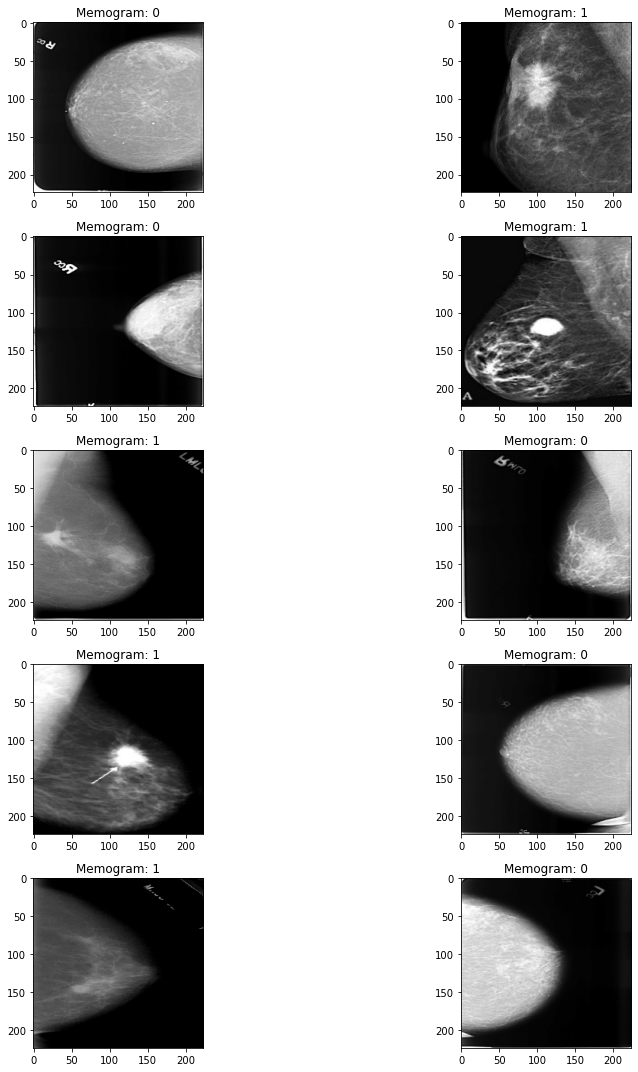

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(feature[l])
        ax[i,j].set_title('Memogram: '+str(labels[l]))
        
plt.tight_layout()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(feature,labels,test_size = 0.25,random_state = 42)

In [134]:
# x_train

In [133]:
# x_test

In [135]:
# y_train

In [66]:
# y_test

In [67]:
# count=0
# fig,ax=plt.subplots(8,2)
# fig.set_size_inches(15,15)
# for i in range (8):
#     for j in range (2):
#         ax[i,j].imshow(x_test[count])
#         ax[i,j].set_title("Actual mammogram : "+str(y_test[count]))
#         plt.tight_layout()
#         count+=1

In [18]:
## CNN MODEL

In [68]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten, Dense, Activation,BatchNormalization

In [69]:
tf.random.set_seed(
  np.random.seed(42)
)

In [70]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(96, (3, 3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding="Same", activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

#     model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(5, activation='sigmoid'))

    model.add(Flatten())

    return model

In [71]:
batch_size=128
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5,
#                                         verbose=1,
#                                         restore_best_weights = True)

In [72]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [73]:
model = create_model()

model.compile(loss='binary_crossentropy',
             optimizer='RMSProp',
             metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)       

In [75]:
# History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
History = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
1/1 [==============================] - 5s 5s/step - loss: 0.8962 - accuracy: 0.0000e+00 - val_loss: 0.7063 - val_accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 0.7723 - accuracy: 0.0000e+00 - val_loss: 0.6956 - val_accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 4s 4s/step - loss: 0.8966 - accuracy: 0.0000e+00 - val_loss: 0.7064 - val_accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 5s 5s/step - loss: 0.6780 - accuracy: 0.0000e+00 - val_loss: 0.6965 - val_accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 5s 5s/step - loss: 0.6570 - accuracy: 0.0000e+00 - val_loss: 0.6949 - val_accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 5s 5s/step - loss: 0.5607 - accuracy: 0.0182 - val_loss: 0.6854 - val_accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 5s 5s/step - loss: 0.4915 - accuracy: 0.0000e+00 - val_loss: 0.6769 - val_accuracy: 

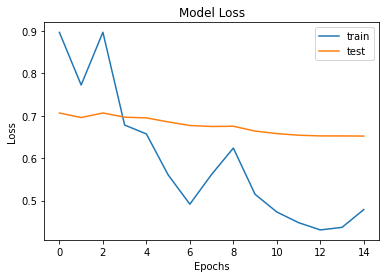

In [76]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

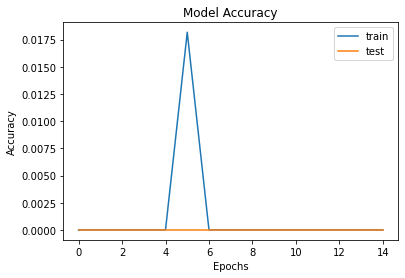

In [77]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [207]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

# pred=model.predict(x_test)
# pred_digits=pred
print(pred_digits)

[ 84 119 254 884 269 429 169  89 634 759 924 269 189 409 399 124 134 264
 219]


In [153]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
        
print(len(prop_class))
print(len(mis_class))

0
19


In [93]:
model.save("BCDCNN.h5")

In [94]:
if len(prop_class)>0:
    count=0
    fig,ax=plt.subplots(4,2)
    fig.set_size_inches(15,15)
    for i in range (4):
        for j in range (2):
            ax[i,j].imshow(x_test[prop_class[count]])
            ax[i,j].set_title("Predicted Flower : "+str([pred_digits[prop_class[count]]])+"\n"+"Actual Flower : "+ str(y_test[prop_class[count]]))
            plt.tight_layout()
            count+=1
else:
    print("every images are miss-classify...")

every images are miss-classify...


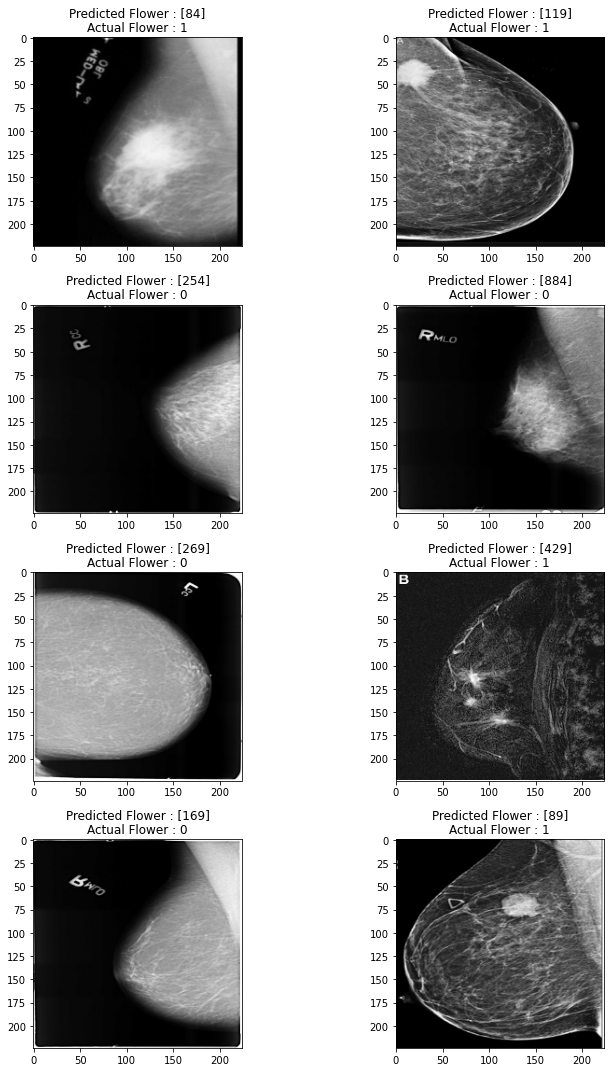

In [95]:
if len(mis_class)>0:
    count=0
    fig,ax=plt.subplots(4,2)
    fig.set_size_inches(15,15)
    for i in range (4):
        for j in range (2):
            ax[i,j].imshow(x_test[mis_class[count]])
            ax[i,j].set_title("Predicted Flower : "+str([pred_digits[mis_class[count]]])+"\n"+"Actual Flower : "+str(y_test[mis_class[count]]))
            plt.tight_layout()
            count+=1
else:
    print("every images are perfectly classify...")

In [96]:
## CNN MODEL FINISHED 

In [97]:
## resnet50 MODEL

In [98]:
from tensorflow.keras.applications import resnet50
from keras.models import Sequential, Model
import tensorflow as tf
from keras.layers import Input, Conv2D,MaxPooling2D, Dropout,Flatten, Dense, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

In [99]:
tf.random.set_seed(
  np.random.seed(42)
)

In [100]:
def create_model1():
    base_model=resnet50.ResNet50(include_top=False, input_shape=(224,224,3))

    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1, activation='sigmoid')(x)
    model1=Model(inputs=base_model.input, outputs=x)


    for layer in base_model.layers:
        layer.trainable=False
    
    return model1

In [101]:
batch_size=128
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr1= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5,
#                                         verbose=1,
#                                         restore_best_weights = True)

In [102]:
datagen1 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen1.fit(x_train)

In [103]:
model1 = create_model1()

model1.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [104]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [105]:
# History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
History1 = model1.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
1/1 [==============================] - 8s 8s/step - loss: 0.6695 - accuracy: 0.6000 - val_loss: 0.8913 - val_accuracy: 0.3684
Epoch 2/15
1/1 [==============================] - 4s 4s/step - loss: 0.6907 - accuracy: 0.6000 - val_loss: 0.7171 - val_accuracy: 0.4211
Epoch 3/15
1/1 [==============================] - 6s 6s/step - loss: 0.6652 - accuracy: 0.6000 - val_loss: 0.7641 - val_accuracy: 0.3684
Epoch 4/15
1/1 [==============================] - 6s 6s/step - loss: 0.6609 - accuracy: 0.6000 - val_loss: 0.7401 - val_accuracy: 0.3684
Epoch 5/15
1/1 [==============================] - 6s 6s/step - loss: 0.6589 - accuracy: 0.6000 - val_loss: 0.7479 - val_accuracy: 0.3684
Epoch 6/15
1/1 [==============================] - 6s 6s/step - loss: 0.6572 - accuracy: 0.6000 - val_loss: 0.7406 - val_accuracy: 0.3684
Epoch 7/15
1/1 [==============================] - 6s 6s/step - loss: 0.6556 - accuracy: 0.6000 - val_loss: 0.7418 - val_accuracy: 0.3684
Epoch 8/15
1/1 [=========================

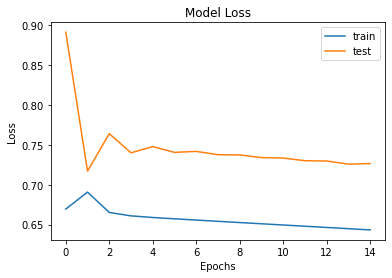

In [106]:
plt.plot(History1.history['loss'])
plt.plot(History1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

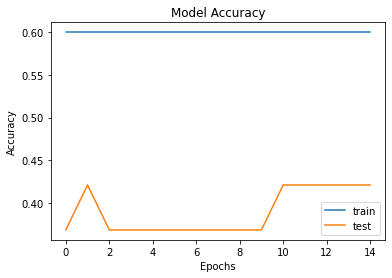

In [107]:
plt.plot(History1.history['accuracy'])
plt.plot(History1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [139]:
# getting predictions on val set.
pred1=model1.predict(x_test)
pred_digits1=np.argmax(pred1,axis=1)
# # pred_digits1= [np.argmax(elements) for elements in pred1]
# pred_digits1 = pred1
print(pred_digits1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [146]:
i=0
prop_class1=[]
mis_class1=[]

for i in range(len(y_test)):
    if(y_test[i])==pred_digits1[i]:
        prop_class1.append(i)

i=0
for i in range(len(y_test)):
    if(not y_test[i]==pred_digits1[i]):
        mis_class1.append(i)
        
print(len(prop_class1))
print(len(mis_class1))

7
12


In [147]:
model1.save("BCDRESNET50.h5")

IndexError: list index out of range

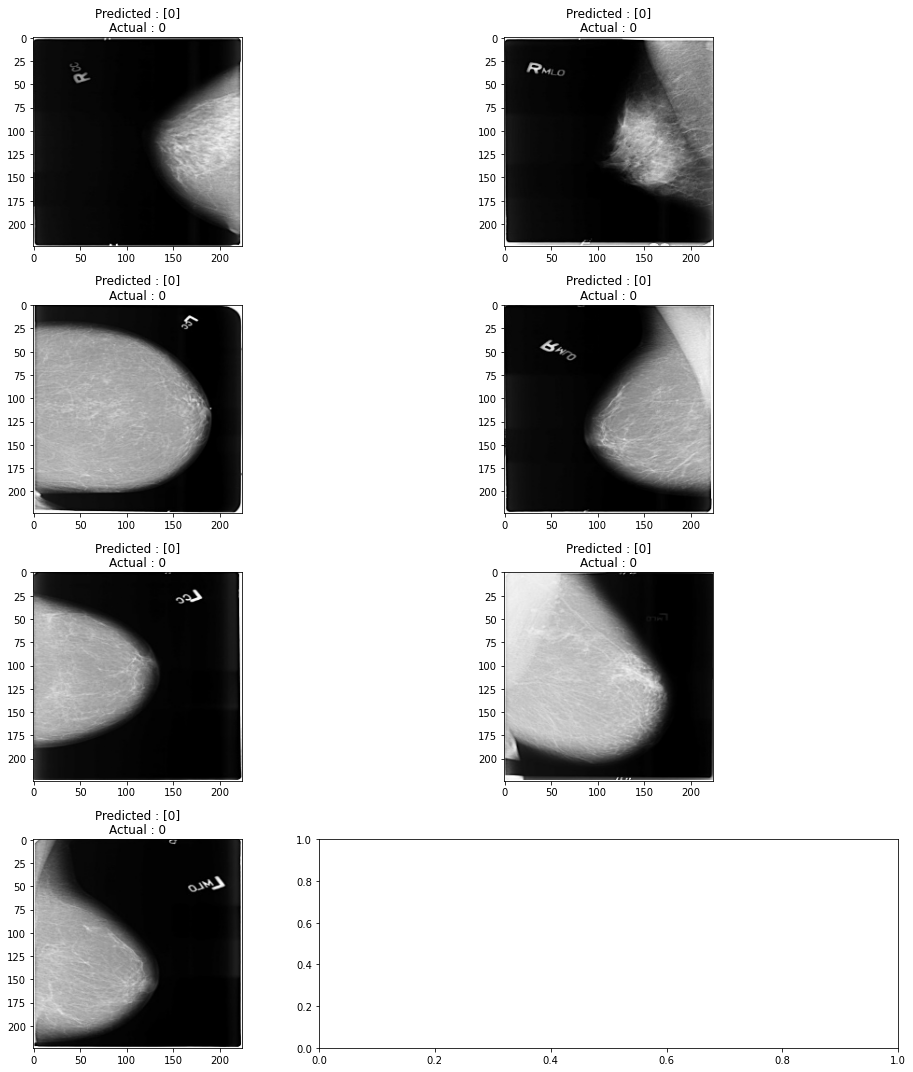

In [148]:
if len(prop_class1)>0:
    count=0
    fig,ax=plt.subplots(4,2)
    fig.set_size_inches(15,15)
    for i in range (4):
        for j in range (2):
            ax[i,j].imshow(x_test[prop_class1[count]])
            ax[i,j].set_title("Predicted : "+str([pred_digits1[prop_class1[count]]])+"\n"+"Actual : "+ str(y_test[prop_class1[count]]))
            plt.tight_layout()
            count+=1
else:
    print("every images are miss-classify...")

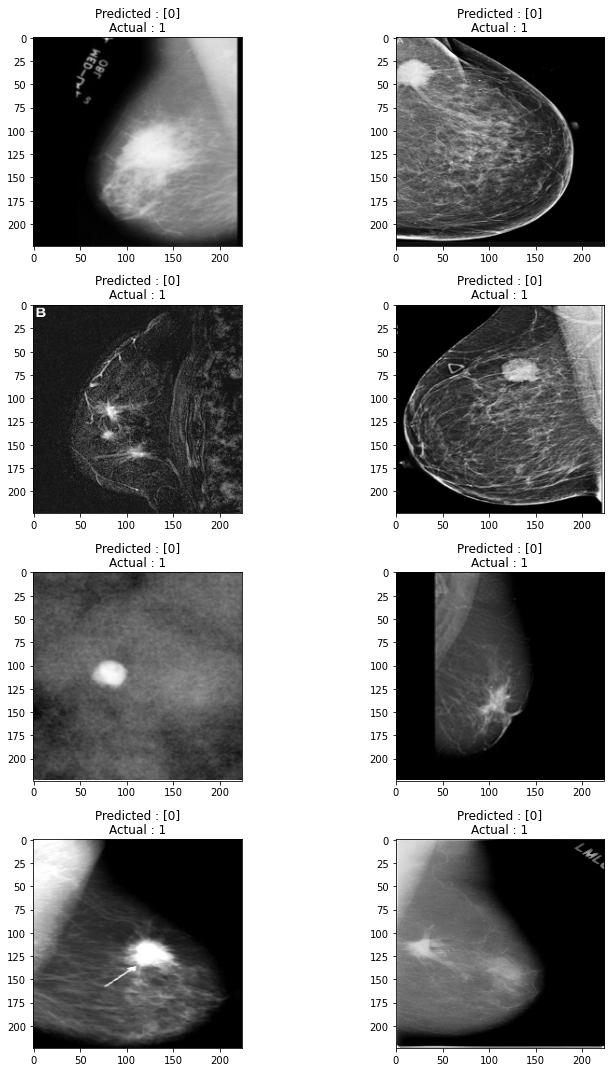

In [149]:
if len(mis_class1)>0:
    count=0
    fig,ax=plt.subplots(4,2)
    fig.set_size_inches(15,15)
    for i in range (4):
        for j in range (2):
            ax[i,j].imshow(x_test[mis_class1[count]])
            ax[i,j].set_title("Predicted : "+str([pred_digits1[mis_class1[count]]])+"\n"+"Actual : "+str(y_test[mis_class1[count]]))
            plt.tight_layout()
            count+=1
else:
    print("every images are perfectly classify...")

In [154]:
## RESNET50 FINISHED

In [72]:
## VGG16

In [73]:
# inception_v3 
from tensorflow.keras.applications import vgg16
from keras.models import Sequential, Model
import tensorflow as tf
from keras.layers import Input, Conv2D,MaxPooling2D, Dropout,Flatten, Dense, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

In [74]:
tf.random.set_seed(
  np.random.seed(42)
)

In [75]:
def create_model1():
    base_model=vgg16.VGG16(include_top=False, input_shape=(224,224,3))

    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1, activation='sigmoid')(x)
    model2=Model(inputs=base_model.input, outputs=x)


    for layer in base_model.layers:
        layer.trainable=False
    
    return model2

In [76]:
batch_size=128
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr2= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5,
#                                         verbose=1,
#                                         restore_best_weights = True)

In [77]:
datagen2 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen2.fit(x_train)

In [78]:
model2 = create_model1()

model2.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [79]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [80]:
# History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
History2 = model2.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
1/1 [==============================] - 21s 21s/step - loss: 0.6967 - accuracy: 0.4545 - val_loss: 0.7277 - val_accuracy: 0.1579
Epoch 2/15
1/1 [==============================] - 17s 17s/step - loss: 0.6793 - accuracy: 0.6182 - val_loss: 0.7292 - val_accuracy: 0.2105
Epoch 3/15
1/1 [==============================] - 16s 16s/step - loss: 0.6700 - accuracy: 0.6000 - val_loss: 0.7269 - val_accuracy: 0.2105
Epoch 4/15
1/1 [==============================] - 16s 16s/step - loss: 0.6626 - accuracy: 0.6000 - val_loss: 0.7232 - val_accuracy: 0.2105
Epoch 5/15
1/1 [==============================] - 17s 17s/step - loss: 0.6563 - accuracy: 0.6000 - val_loss: 0.7190 - val_accuracy: 0.2632
Epoch 6/15
1/1 [==============================] - 16s 16s/step - loss: 0.6506 - accuracy: 0.6000 - val_loss: 0.7146 - val_accuracy: 0.2632
Epoch 7/15
1/1 [==============================] - 16s 16s/step - loss: 0.6453 - accuracy: 0.6000 - val_loss: 0.7100 - val_accuracy: 0.2632
Epoch 8/15
1/1 [===========

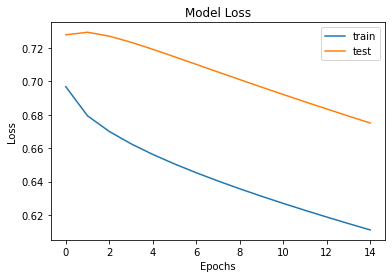

In [81]:
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

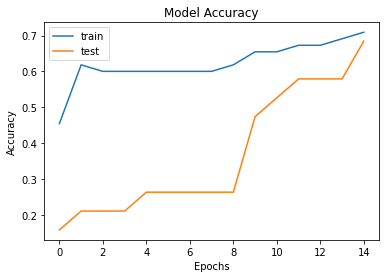

In [82]:
plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [83]:
# getting predictions on val set.
pred2=model2.predict(x_test)
pred_digits2=np.argmax(pred2,axis=1)

In [214]:
i=0
prop_class2=[]
mis_class2=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits2[i]):
        prop_class2.append(i)

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits2[i]):
        mis_class2.append(i)
        
print(len(prop_class2))
print(len(mis_class2))

NameError: name 'pred_digits2' is not defined

In [85]:
model2.save("BCDVGG16.h5")

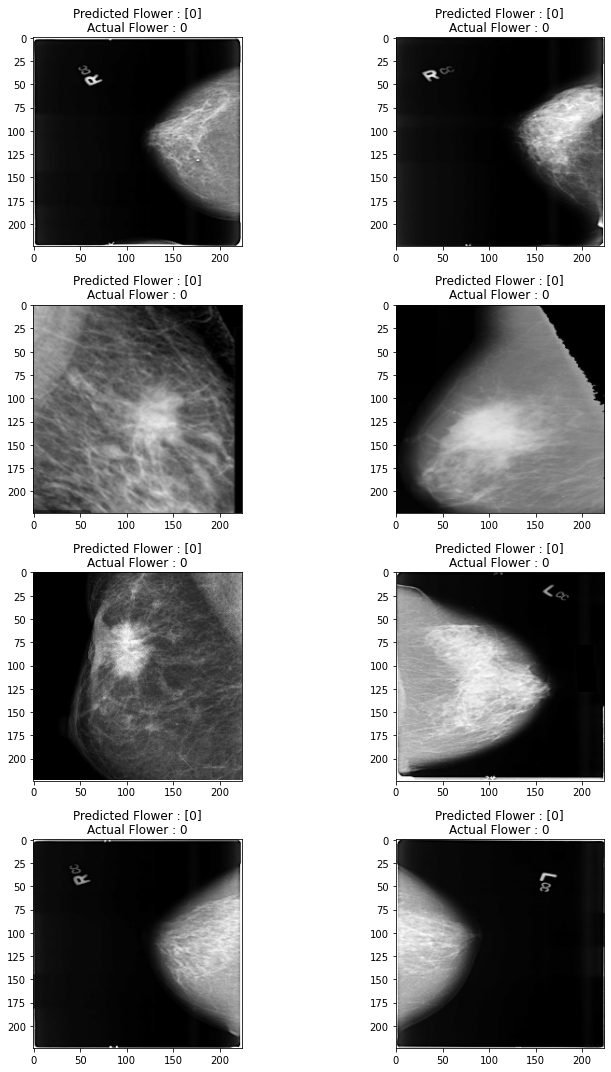

In [86]:
if len(prop_class2)>0:
    count=0
    fig,ax=plt.subplots(4,2)
    fig.set_size_inches(15,15)
    for i in range (4):
        for j in range (2):
            ax[i,j].imshow(x_test[prop_class2[count]])
            ax[i,j].set_title("Predicted Flower : "+str([pred_digits2[prop_class2[count]]])+"\n"+"Actual Flower : "+ str(np.argmax([y_test[prop_class2[count]]])))
            plt.tight_layout()
            count+=1
else:
    print("every images are miss-classify...")

In [87]:
if len(mis_class2)>0:
    count=0
    fig,ax=plt.subplots(4,2)
    fig.set_size_inches(15,15)
    for i in range (4):
        for j in range (2):
            ax[i,j].imshow(x_test[mis_class2[count]])
            ax[i,j].set_title("Predicted Flower : "+str([pred_digits2[mis_class2[count]]])+"\n"+"Actual Flower : "+str(np.argmax([y_test[mis_class2[count]]])))
            plt.tight_layout()
            count+=1
else:
    print("every images are perfectly classify...")

every images are perfectly classify...


In [88]:
## VGG16 FINISHED

In [154]:
## inception_v3 

In [155]:
from tensorflow.keras.applications import inception_v3 
from keras.models import Sequential, Model
import tensorflow as tf
from keras.layers import Input, Conv2D,MaxPooling2D, Dropout,Flatten, Dense, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

In [156]:
tf.random.set_seed(
  np.random.seed(42)
)

In [157]:
def create_model1():
    base_model=inception_v3.InceptionV3(include_top=False, input_shape=(224,224,3))

    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    x=Dense(1, activation='sigmoid')(x)  #softmax
    model3=Model(inputs=base_model.input, outputs=x)


    for layer in base_model.layers:
        layer.trainable=False
    
    return model3

In [158]:
batch_size=128
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr3= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# from keras import callbacks
# earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5,
#                                         verbose=1,
#                                         restore_best_weights = True)

In [159]:
datagen3 = ImageDataGenerator(
#         rescale = 1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen3.fit(x_train)

In [160]:
model3 = create_model1()

model3.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [161]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, 111, 111, 32) 96          conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_10[0][0]     
____________________________________________________________________________________________

In [162]:
# History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
History3 = model3.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.7358 - accuracy: 0.4545 - val_loss: 1.2109 - val_accuracy: 0.3684
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 0.8578 - accuracy: 0.6000 - val_loss: 0.5027 - val_accuracy: 0.8421
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 0.5467 - accuracy: 0.7636 - val_loss: 0.6015 - val_accuracy: 0.5263
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 0.4774 - accuracy: 0.7273 - val_loss: 0.4334 - val_accuracy: 0.9474
Epoch 5/100
1/1 [==============================] - 4s 4s/step - loss: 0.4125 - accuracy: 0.9455 - val_loss: 0.4526 - val_accuracy: 0.8947
Epoch 6/100
1/1 [==============================] - 4s 4s/step - loss: 0.3702 - accuracy: 0.9091 - val_loss: 0.3857 - val_accuracy: 0.9474
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 0.3354 - accuracy: 0.9636 - val_loss: 0.3797 - val_accuracy: 0.9474
Epoch 8/100
1/1 [=================

1/1 [==============================] - 4s 4s/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.0832 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 4s 4s/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0818 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 4s 4s/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 1.0000
Epoch 63/100
1/1 [==============================] - 4s 4s/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 4s 4s/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 1.0000
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 1.0000
Epoch 66/100
1/1 [==============================] - 4s 4s/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 1.0000
Epoch 67/100
1/1 [======================

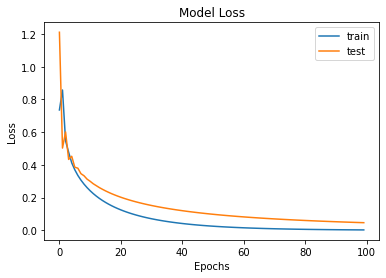

In [163]:
plt.plot(History3.history['loss'])
plt.plot(History3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

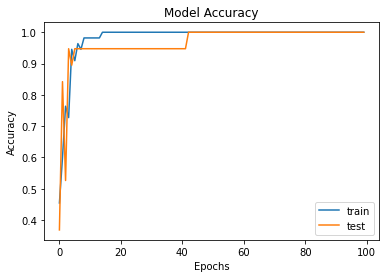

In [164]:
plt.plot(History3.history['accuracy'])
plt.plot(History3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [226]:
# getting predictions on val set.
pred3=model3.predict(x_test)
pred_digits3=pred3
# pred_digits3=np.argmax(pred3,axis=1)
print(pred_digits3)

[[8.6933464e-01]
 [9.9780166e-01]
 [6.5898895e-04]
 [3.8917363e-03]
 [8.1691146e-03]
 [9.9910891e-01]
 [4.4562817e-02]
 [9.9804348e-01]
 [9.7440809e-01]
 [4.9287081e-04]
 [9.9390924e-01]
 [4.4660866e-03]
 [3.4046143e-01]
 [9.2971003e-01]
 [9.9891382e-01]
 [9.9970460e-01]
 [8.5977089e-01]
 [9.9878311e-01]
 [9.9859107e-01]]


In [227]:
y_test

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [228]:
i=0
prop_class3=[]
mis_class3=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits3[i]):
        prop_class3.append(i)

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits3[i]):
        mis_class3.append(i)
        
print(len(prop_class3))
print(len(mis_class3))

0
19


In [229]:
model3.save("BCDinceptionV3.h5")

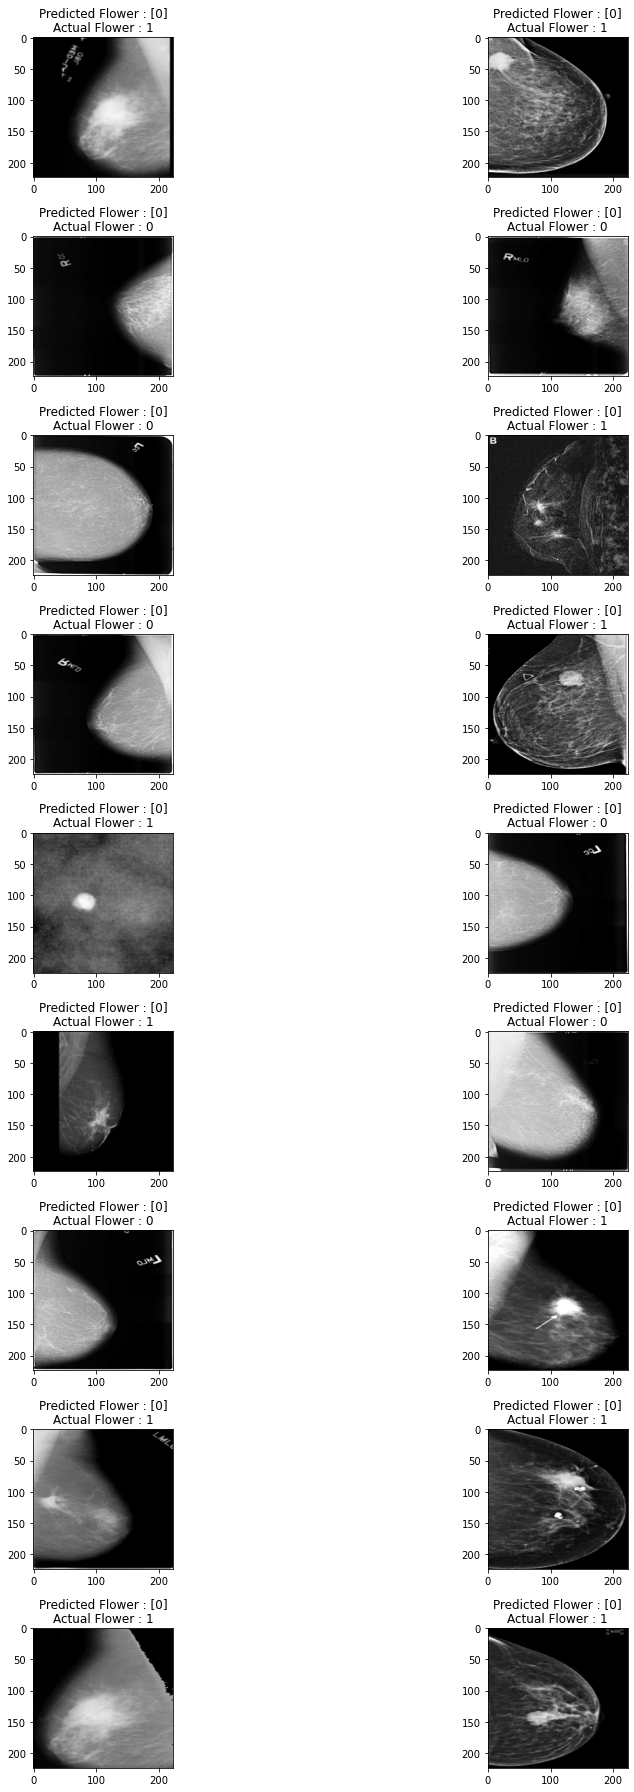

In [183]:
if len(prop_class3)>0:
    count=0
    fig,ax=plt.subplots(9,2)
    fig.set_size_inches(25,25)
    for i in range (9):
        for j in range (2):
            ax[i,j].imshow(x_test[prop_class3[count]])
            ax[i,j].set_title("Predicted Flower : "+str([pred_digits3[prop_class3[count]]])+"\n"+"Actual Flower : "+ str(y_test[prop_class3[count]]))
            plt.tight_layout()
            count+=1
else:
    print("every images are miss-classify...")

In [179]:
if len(mis_class3)>0:
    count=0
    fig,ax=plt.subplots(4,2)
    fig.set_size_inches(15,15)
    for i in range (4):
        for j in range (2):
            ax[i,j].imshow(x_test[mis_class3[count]])
            ax[i,j].set_title("Predicted Flower : "+str([pred_digits3[mis_class3[count]]])+"\n"+"Actual Flower : "+str(np.argmax([y_test[mis_class3[count]]])))
            plt.tight_layout()
            count+=1
else:
    print("every images are perfectly classify...")

every images are perfectly classify...


In [ ]:
## inception_v3 FINISHED

In [ ]:
data = 
prediction = BCDinceptionV3.predict(data)
print(prediction)